## Data Analysis in Python
_Author: Georgy Tarasenko_

## Seminar 11

### Seminar outline

* Variable types - theory;
* Variable types - practice (e.g. visualization);
* Data aggregation in pandas;
* Practice.

## Variable types

We already know that variable is a property of some analytical unit (respondent, firm, country etc.). Variable should have at least 2 different values. 

Variables can be classifies into two main categories: **categorical** and **numeric**.  Each category is then classified in two subcategories: **nominal** or **ordinal** for categorical variables, **discrete** or **continuous** for numeric variables. 



### Categorical variables

A categorical variable refers to a characteristic that can’t be quantifiable; it can be either nominal or ordinal.

#### Nominal variables

A nominal variable is one that describes a name, label or category **without natural order**. Sex, type of dwelling, vaccination status, city of birth are examples of nominal variables.

Some nominal variables have only two values (for instance, Yes/No, 1/0, TRUE/FALSE etc). These nominal variables are called **dummy** or **binary** variables.

#### Ordinal Variables

An ordinal variable is a variable whose values are defined by an order relation between the different categories. For example, it can be a grading scale with values `Excellent`, `Very good`, `Good`, `Bad` and `Very bad`. There is some natural ordering, but it is limited since we do not know by how much `Excellent` behaviour is better than `Very good` behaviour.

It is important to note that even if categorical variables are not quantifiable, they can appear as numbers in a data set. Correspondence between these numbers and the categories is established during data coding. To be able to identify the type of variable, it is important to have access to the **metadata** (the data about the data) that should include the code set used for each categorical variable. 

### Numeric variables

A numeric variable is a quantifiable characteristic whose values are numbers (except numbers which are the codes standing up for categories). Numeric variables may be either continuous or discrete.

#### Continuous variables
A variable is said to be continuous if it can assume an **infinite** number of **real** values within a given interval. For instance, consider the income of a random Russian citizen. The income can’t take any values. It can’t be negative. But at the interval from 0 to the number of possible values is theoretically infinite. 

#### Discrete variables
As opposed to a continuous variable, a discrete variable can assume only a finite number of real values within a given interval. An example of a discrete variable would be the score given by a judge to a gymnast in competition: the range is 0 to 10 and the score is always given to one decimal (e.g. a score of 8.5). You can enumerate all possible values (0, 0.1, 0.2…) and see that the number of possible values is finite: it is 101! 

**Issue.** Find out the type of the following variables:

* height;
* age (in years);
* type of occupation;
* level of trust to government (from 1 - "No trust at all" to 5 - "Completely trust");
* ratio (percent) of literate citizens.

##### Let's see on a real data example.

Today we will be working with the dataset from *The Armed Conflict Location and Event Data Project*. The dataset codes the dates and locations of all reported political violence and protest events in dozens of developing countries in Africa. Political violence and protest includes events that occur within civil wars and periods of instability, public protest and regime breakdown. The project covers all African countries from 1997 to 2017.

[More about the data](https://www.kaggle.com/datasets/jboysen/african-conflicts)

In [1]:
import pandas as pd
afr_confl = pd.read_csv('african_conflicts_events.csv')
afr_confl.head()

C:\Users\M050\AppData\Local\Temp\ipykernel_16644\2083019764.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  afr_confl = pd.read_csv('african_conflicts_events.csv')


,ADMIN1,ADMIN2,ADMIN3,COUNTRY,EVENT_DATE,EVENT_TYPE,FATALITIES,GWNO,LATITUDE,LOCATION,LONGITUDE
0,Tizi Ouzou,Beni-Douala,NaN,Algeria,18/04/2001,Violence against civilians,1,615,36.61954,Beni Douala,4.08282
1,Tizi Ouzou,Tizi Ouzou,NaN,Algeria,19/04/2001,Riots/Protests,0,615,36.71183,Tizi Ouzou,4.04591
2,Bejaia,Amizour,NaN,Algeria,20/04/2001,Riots/Protests,0,615,36.64022,Amizour,4.90131
3,Bejaia,Amizour,NaN,Algeria,21/04/2001,Riots/Protests,0,615,36.64022,Amizour,4.90131
4,Tizi Ouzou,Beni-Douala,NaN,Algeria,21/04/2001,Riots/Protests,0,615,36.61954,Beni Douala,4.08282


**NaN, NA.** Sometimes we cannot collect all the information. These values are specially designed to show where our information is incomplete.

- ADMIN1 - first actor of the conflict
- ADMIN2 - second actor of the conflict
- ADMIN3 - third actor of the conflict
- COUNTRY - country of the conflict
- EVENT_DATE - date of the conflict
- EVENT_TYPE - Event occurrence, string e.g. “Riots against police”
- FATALITIES - Integer value of fatalities that occurred, as reported by source
- GWNO - Gleditsch & Ward (2007) country code
- LATITUDE - The latitude of the location
- LOCATION - The location where event occurred
- LONGITUDE - The longitude of the location

Let's check data types:

In [ ]:
afr_confl.dtypes

In [ ]:
afr_confl.info()

We see that pandas automatically treats EVENT_DATE and LATITUDE / LONGITUDE as objects, but it is numeric data. Let's change it.

In [ ]:
afr_confl['LONGITUDE']

In [ ]:
pd.to_numeric(afr_confl['LONGITUDE'], errors='coerce')

In [ ]:
afr_confl['NEW_COLUMN'] = 2

In [ ]:
afr_confl.tail()

In [2]:
afr_confl['LONGITUDE'] = pd.to_numeric(afr_confl['LONGITUDE'], errors='coerce')
afr_confl['LATITUDE'] = pd.to_numeric(afr_confl['LATITUDE'], errors='coerce')
afr_confl['EVENT_DATE'] = pd.to_datetime(afr_confl['EVENT_DATE'], errors='coerce')

afr_confl['GWNO'] = afr_confl['GWNO'].astype(str) # country code is rather categorical data

C:\Users\M050\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '18/04/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\M050\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19/04/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\M050\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '20/04/2001' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\M050\AppData\Local\Programs\Python\Python310\lib\site-packages\p

In [ ]:
afr_confl['GWNO'].astype(str)

In [ ]:
afr_confl.info()

In [ ]:
afr_confl.dtypes

Some main statistical properties of the whole dataset can be accessed via `.describe()` method:

In [5]:
afr_confl.describe()

,FATALITIES,LATITUDE,LONGITUDE
count,165808.000000,165806.000000,165797.000000
mean,4.420257,5.456231,24.472984
std,76.071441,16.366091,15.962719
min,0.000000,-34.710100,-17.464600
25%,0.000000,-1.326100,13.614610
50%,0.000000,4.878300,29.233900
75%,1.000000,12.055600,34.060000
max,25000.000000,37.274420,51.266800


In [ ]:
afr_confl[['FATALITIES', 'LATITUDE', 'LONGITUDE']]

In [ ]:
afr_confl[['FATALITIES', 'LATITUDE', 'LONGITUDE']].mean()

As you can see it is automatically applied only to numerical variables

For non-numerical variables values counts will be more relevant:

In [ ]:
afr_confl['EVENT_TYPE'].value_counts()

In [ ]:
afr_confl['COUNTRY'].value_counts()

### Basic Visualization

For numeric variables one the basic necessary plot is histogram showing the distribution of values. Data on latitude is numeric, so let's see the distribution:

In [3]:
afr_confl.head()

,ADMIN1,ADMIN2,ADMIN3,COUNTRY,EVENT_DATE,EVENT_TYPE,FATALITIES,GWNO,LATITUDE,LOCATION,LONGITUDE
0,Tizi Ouzou,Beni-Douala,NaN,Algeria,2001-04-18,Violence against civilians,1,615,36.61954,Beni Douala,4.08282
1,Tizi Ouzou,Tizi Ouzou,NaN,Algeria,2001-04-19,Riots/Protests,0,615,36.71183,Tizi Ouzou,4.04591
2,Bejaia,Amizour,NaN,Algeria,2001-04-20,Riots/Protests,0,615,36.64022,Amizour,4.90131
3,Bejaia,Amizour,NaN,Algeria,2001-04-21,Riots/Protests,0,615,36.64022,Amizour,4.90131
4,Tizi Ouzou,Beni-Douala,NaN,Algeria,2001-04-21,Riots/Protests,0,615,36.61954,Beni Douala,4.08282


array([[<AxesSubplot:title={'center':'LATITUDE'}>]], dtype=object)

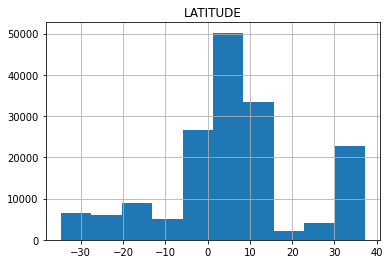

In [4]:
afr_confl.hist(column='LATITUDE')

If we want our histogram to be more detail we can change `bins` parameter:

array([[<AxesSubplot:title={'center':'LATITUDE'}>]], dtype=object)

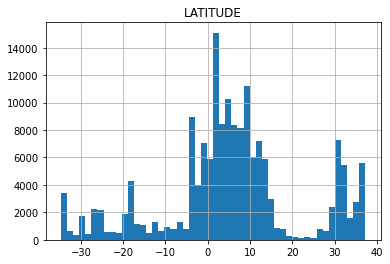

In [6]:
afr_confl.hist(column='LATITUDE', bins=50)

array([[<AxesSubplot:title={'center':'FATALITIES'}>]], dtype=object)

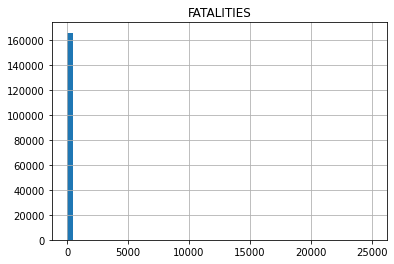

In [7]:
afr_confl.hist(column='FATALITIES', bins=50)

In [8]:
afr_confl.head()

,ADMIN1,ADMIN2,ADMIN3,COUNTRY,EVENT_DATE,EVENT_TYPE,FATALITIES,GWNO,LATITUDE,LOCATION,LONGITUDE
0,Tizi Ouzou,Beni-Douala,NaN,Algeria,2001-04-18,Violence against civilians,1,615,36.61954,Beni Douala,4.08282
1,Tizi Ouzou,Tizi Ouzou,NaN,Algeria,2001-04-19,Riots/Protests,0,615,36.71183,Tizi Ouzou,4.04591
2,Bejaia,Amizour,NaN,Algeria,2001-04-20,Riots/Protests,0,615,36.64022,Amizour,4.90131
3,Bejaia,Amizour,NaN,Algeria,2001-04-21,Riots/Protests,0,615,36.64022,Amizour,4.90131
4,Tizi Ouzou,Beni-Douala,NaN,Algeria,2001-04-21,Riots/Protests,0,615,36.61954,Beni Douala,4.08282


In [9]:
afr_confl['FATALITIES'].value_counts()

0       113321
1        18316
2         7978
3         4628
4         3026
         ...  
1037         1
650          1
119          1
159          1
209          1
Name: FATALITIES, Length: 263, dtype: int64

**Quartile.** It can be either lower and upper. Recall the median: it divides sample into two equal parts. *Lower quartile* is, in its turn, the median of the left part while *upper quartile* is the median of the right part. So, we have 25% of values on the left from *lower quartile* and 75% of values on the left from *upper quartile*.

Main statisitical properties of a numeric variable can be visualized via **boxplot** (box-and-whiskers). "Box" size here is defined by lower and upper quartile. A line on the box indicates  medians value. "Whiskers" endings are the outliers threshold. 

array([[<AxesSubplot:title={'center':'LATITUDE'}>]], dtype=object)

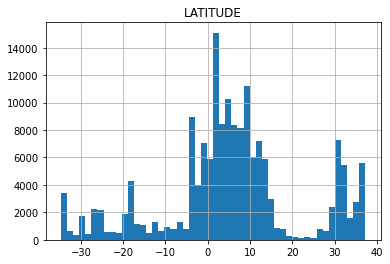

In [11]:
afr_confl.hist(column='LATITUDE', bins=50)

<AxesSubplot:>

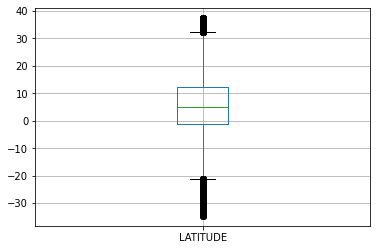

In [10]:
# import matplotlib.pyplot as plt
# fig, ax = plt.subplots(figsize=(7, 7))
afr_confl.boxplot(column='LATITUDE')

Sometimes boxplot cannot tell a lot, if our variable if is reach for outliers:

In [12]:
afr_confl[['FATALITIES']].describe()

,FATALITIES
count,165808.000000
mean,4.420257
std,76.071441
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,25000.000000


<AxesSubplot:>

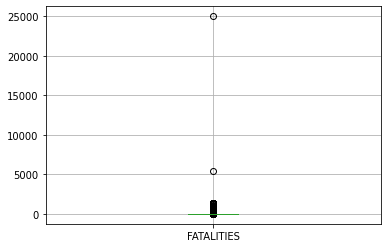

In [13]:
afr_confl.boxplot(column='FATALITIES')

**Indexing using logical arrays.**

In [ ]:
afr_confl.head()

Operations in `pandas` are vectorized. Compare:

In [14]:
some_list = [1, 2, 3]
some_pds = pd.Series(some_list)

In [15]:
some_list * 2

[1, 2, 3, 1, 2, 3]

In [16]:
some_pds

0    1
1    2
2    3
dtype: int64

In [17]:
some_pds * 2 # operator as applied to each value in the sequence

0    2
1    4
2    6
dtype: int64

In [18]:
some_pds + 5

0    6
1    7
2    8
dtype: int64

In [19]:
afr_confl['FATALITIES']

0         1
1         0
2         0
3         0
4         0
         ..
165803    0
165804    0
165805    0
165806    0
165807    0
Name: FATALITIES, Length: 165808, dtype: int64

In [23]:
afr_confl['FATALITIES'] > 10 # operations in pandas are vectorized

0         False
1         False
2         False
3         False
4         False
          ...  
165803    False
165804    False
165805    False
165806    False
165807    False
Name: FATALITIES, Length: 165808, dtype: bool

In [21]:
afr_confl.head()

,ADMIN1,ADMIN2,ADMIN3,COUNTRY,EVENT_DATE,EVENT_TYPE,FATALITIES,GWNO,LATITUDE,LOCATION,LONGITUDE
0,Tizi Ouzou,Beni-Douala,NaN,Algeria,2001-04-18,Violence against civilians,1,615,36.61954,Beni Douala,4.08282
1,Tizi Ouzou,Tizi Ouzou,NaN,Algeria,2001-04-19,Riots/Protests,0,615,36.71183,Tizi Ouzou,4.04591
2,Bejaia,Amizour,NaN,Algeria,2001-04-20,Riots/Protests,0,615,36.64022,Amizour,4.90131
3,Bejaia,Amizour,NaN,Algeria,2001-04-21,Riots/Protests,0,615,36.64022,Amizour,4.90131
4,Tizi Ouzou,Beni-Douala,NaN,Algeria,2001-04-21,Riots/Protests,0,615,36.61954,Beni Douala,4.08282


In [24]:
afr_confl[afr_confl['FATALITIES'] > 10]

,ADMIN1,ADMIN2,ADMIN3,COUNTRY,EVENT_DATE,EVENT_TYPE,FATALITIES,GWNO,LATITUDE,LOCATION,LONGITUDE
20,Tebessa,Tebessa,NaN,Algeria,2001-04-28,Battle-No change of territory,40,615,35.40417,Tebessa,8.12417
74,Chlef,Chlef,NaN,Algeria,2001-06-18,Battle-No change of territory,20,615,36.16525,Chlef,1.33452
109,Mascara,Mascara,NaN,Algeria,2001-08-25,Violence against civilians,15,615,35.39440,Mascara,0.13970
599,Cabinda,Cabinda,Cabinda,Angola,2017-04-15,Battle-No change of territory,16,540,-5.57582,Cabinda,12.18712
611,Cabinda,Cabinda,Cabinda,Angola,2017-05-15,Battle-No change of territory,16,540,-5.57582,Cabinda,12.18712
...,...,...,...,...,...,...,...,...,...,...,...
159049,Gulu,Gulu,Pece,Uganda,2005-08-31,Battle-No change of territory,50,500,2.76670,Gulu,32.30560
159223,Copperbelt,Chililabombwe,NaN,Zambia,2007-02-06,Riots/Protests,12,551,-12.36660,Chililabombwe,27.83330
160399,Harare,Harare,Harare City Council,Zimbabwe,2000-09-07,Violence against civilians,13,552,-17.83330,Harare,31.05000
161756,Mashonaland Central,Mazowe,Mazowe RDC,Zimbabwe,2008-05-06,Violence against civilians,11,552,-17.08330,Chiweshe Tribal Trust Land,31.08330


For vectorized logical operations in `pandas` we cannot use traditional `and`, `or` and `not`. Instead:

<table>
    <tr>
        <td style="text-align: center;"><b>Python in-built</b></td>
        <td style="text-align: center;"><b>pandas</b></td>
    </tr>
    <tr>
        <td style="text-align: center;">and</td>
        <td style="text-align: center;">&</td>
    </tr>
    <tr>
        <td style="text-align: center;">or</td>
        <td style="text-align: center;">|</td>
    </tr>
    <tr>
        <td style="text-align: center;">not</td>
        <td style="text-align: center;">~</td>
    </tr>
</table>

In [ ]:
(afr_confl['FATALITIES'] > 10) & (afr_confl['COUNTRY'] == 'Uganda')

In [ ]:
afr_confl[(afr_confl['FATALITIES'] > 10) & (afr_confl['COUNTRY'] == 'Uganda')] # & == and

In [ ]:
(afr_confl['FATALITIES'] > 10) | (afr_confl['COUNTRY'] == 'Uganda') # | == or

In that case let's take the conflict with fatalities between 1 and 10:

In [ ]:
afr_confl_1 = afr_confl[(afr_confl["FATALITIES"] <= 10) & (afr_confl["FATALITIES"] >= 1)]
afr_confl_1.shape

In [ ]:
afr_confl_1.boxplot(column='FATALITIES')

For categorical variables it is plausible to visualize value counts via `bar` method.

In [ ]:
afr_confl['EVENT_TYPE'].value_counts()

In [ ]:
afr_confl['EVENT_TYPE'].value_counts().plot.bar()

In [ ]:
afr_confl['EVENT_TYPE'].value_counts().plot.barh()

In [ ]:
afr_confl['COUNTRY'].value_counts().plot.barh(rot = 45, fontsize=10, figsize=(10,10))

### Creating new columns

Let's consider some ways to create a new column based on the existing one. Let's say we want to classify all of the conflicts in the dataset by the number of fatalities. 

In [ ]:
def categorise_conflict(row):
    if row['FATALITIES'] == 0:
        return 'NOT FATAL'
    elif row['FATALITIES'] > 0 and row['FATALITIES'] <= 10:
        return 'LOW FATALITY'
    elif row['FATALITIES'] > 10 and row['FATALITIES'] <= 50:
        return 'MEDIUM FATALITY'
    elif row['FATALITIES'] > 50 and row['FATALITIES'] <= 150:
        return 'LARGE FATALITY'
    else:
        return 'MASS FATALITY'

In [ ]:
afr_confl['FATALITIES']

In [ ]:
afr_confl.head()

In [ ]:
afr_confl['FATALITIES'] * 5

In [ ]:
afr_confl['FATALITIES5'] = afr_confl['FATALITIES'] * 5

In [ ]:
afr_confl.head()

In [ ]:
afr_confl['FATALITY_CATEGORY'] = afr_confl.apply(lambda row: categorise_conflict(row), axis=1)

In [ ]:
afr_confl.head()

In [ ]:
afr_confl.drop(columns=['EVENT_DATE'])

### Agreggation

The most basic split-apply-combine operation can be computed with the `groupby()` method of DataFrames, passing the name of the desired key column:



In [ ]:
afr_grouped = afr_confl.groupby('FATALITY_CATEGORY').mean()
afr_grouped

In [ ]:
afr_grouped.reset_index()

In [ ]:
afr_confl.groupby('COUNTRY')['FATALITIES'].sum().reset_index()

The following table summarizes some other built-in Pandas aggregations:

| Aggregation              | Description                     |
|--------------------------|---------------------------------|
| ``count()``              | Total number of items           |
| ``first()``, ``last()``  | First and last item             |
| ``mean()``, ``median()`` | Mean and median                 |
| ``min()``, ``max()``     | Minimum and maximum             |
| ``std()``, ``var()``     | Standard deviation and variance |
| ``mad()``                | Mean absolute deviation         |
| ``prod()``               | Product of all items            |
| ``sum()``                | Sum of all items                |

These are all methods of ``DataFrame`` and ``Series`` objects.

### Practice

#### Task 1
Sum the fatality rates by conflict type and visualize it via barplot. What is going to change if the aggregations rule will be the mean of fatality rates?

In [ ]:
### your code here

#### Task 2
Sum the fatality rates by actors (for instance, first column of the dataset). Visualize it via 

In [ ]:
### your code here